# Lab Assignment 2

**Computer Vision** - Term 5, 2022

Instructor: Dr. Saumya Jetly <br>
TA: Ribhu Lahiri

*Deadline: Sunday, 13 March 2022 11:59 am* 

Submission form link: https://forms.gle/HGkVEoMgK62C7oWd7

Total points: 5 (with possible extra credit)


### Task 1: Creating and applying new filters (3 points)
The first task is to create the convolve function. As discussed in lecture, you need to implement a function which takes a filter (kernel) and convolves it over the image using a sliding window. As an output you should get the processed image.

**Extra Credit:** Create a mathematical convolution function and a correlation function. Use both on the same image with the same filter. Is there a difference in the output? (0.5 points)

In [31]:
# Imports 
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import scipy.fftpack as fp

In [32]:
# Reading in a sample image
from PIL import Image

im = cv2.imread("lena.png", 0)

**Implement the convolve function** *(2 points)*

Use the helper method `sliding_window` to create a function that uses the sliding window to convolve over a given image.

In [33]:
# Task: 

def sliding_window(receptive_field, filter):
    ''' 
    Convolves a filter over the receptive field from the image

    Parameters
    ----------
    receptive_field: np.ndarray
        The portion of the image the convolution is being done over

    filter: np.ndarray
        The defined filter

    Returns
    -------
    np.ndarray
        The convolved receptive field output

    '''
  
    return np.sum(filter * receptive_field)
    
def convolve(image, kernel):
    ''' 
    Convolves the filter over the image (sliding window)

    Parameters
    ----------
    image: np.ndarray
        The image as a 2-dimensional matrix

    kernel: np.ndarray
        The defined filter

    Returns
    -------
    output_image: np.ndarray
        The image after convolving the filter over it
    '''


    image_size = image.shape
    kernel_size = kernel.shape
      # Zero padding to return output of same size as input
    if image_size[0]%2!=0:
      image=cv2.resize(image,(image.shape[0]-1,image.shape[1]))
    if image_size[1]%2!=0:
      image=cv2.resize(image,(image.shape[0],image.shape[1]-1))

    # Calculating the number of zeros to be padded to get the output size same as input
    x_padding_size=((image_size[0]+kernel_size[0]-1)-image_size[0])//2
    y_padding_size=((image_size[1]+kernel_size[1]-1)-image_size[1])//2
    
   # Zero Padding
    image=np.vstack((np.zeros((y_padding_size,image.shape[1])),image))
    image=np.vstack((image,np.zeros((y_padding_size,image.shape[1]))))
    image=np.hstack((image,np.zeros((image.shape[0],x_padding_size))))
    image=np.hstack((np.zeros((image.shape[0],x_padding_size)),image))

   
    #Flipping Kernel to do convolution
    kernel = np.flipud(np.fliplr(kernel))



    image_size = image.shape[0]
    kernel_size = kernel.shape[0]

    # Creating two for loops to iterate over different sliding windows
    convoluted_image=[]
    for x_slide in range(0,image_size-kernel_size+1):
      temp_result=[]
      for y_slide in range(0,image_size-kernel_size+1):
        # Now we have to get the sub image to pass to the calculator function
        window=[]
        for i in range(x_slide,x_slide+kernel_size):
          temp=[]
          for j in range(y_slide,y_slide+kernel_size):
            temp.append(image[i][j])
          window.append(temp)
        temp_result.append(int(sliding_window(np.array(window),np.array(kernel)).sum()))
      convoluted_image.append(temp_result)
    return(np.array(convoluted_image))


def correlate(image, kernel):
    ''' 
    Convolves the filter over the image (sliding window)

    Parameters
    ----------
    image: np.ndarray
        The image as a 2-dimensional matrix

    kernel: np.ndarray
        The defined filter

    Returns
    -------
    output_image: np.ndarray
        The image after convolving the filter over it
    '''
    image_size = image.shape
    kernel_size = kernel.shape
      # Zero padding to return output of same size as input
    if image_size[0]%2!=0:
      image=cv2.resize(image,(image.shape[0]-1,image.shape[1]))
    if image_size[1]%2!=0:
      image=cv2.resize(image,(image.shape[0],image.shape[1]-1))

    # Calculating the number of zeros to be padded to get the output size same as input
    x_padding_size=((image_size[0]+kernel_size[0]-1)-image_size[0])//2
    y_padding_size=((image_size[1]+kernel_size[1]-1)-image_size[1])//2
    
   # Zero Padding
    image=np.vstack((np.zeros((y_padding_size,image.shape[1])),image))
    image=np.vstack((image,np.zeros((y_padding_size,image.shape[1]))))
    image=np.hstack((image,np.zeros((image.shape[0],x_padding_size))))
    image=np.hstack((np.zeros((image.shape[0],x_padding_size)),image))

    image_size = image.shape[0]
    kernel_size = kernel.shape[0]

    # Creating two for loops to iterate over different sliding windows
    convoluted_image=[]
    for x_slide in range(0,image_size-kernel_size+1):
      temp_result=[]
      for y_slide in range(0,image_size-kernel_size+1):
        # Now we have to get the sub image to pass to the calculator function
        window=[]
        for i in range(x_slide,x_slide+kernel_size):
          temp=[]
          for j in range(y_slide,y_slide+kernel_size):
            temp.append(image[i][j])
          window.append(temp)
        temp_result.append(int(sliding_window(np.array(window),np.array(kernel)).sum()))
      convoluted_image.append(temp_result)
    return(np.array(convoluted_image))

Text(0.5, 1.0, 'Convoluted Image')

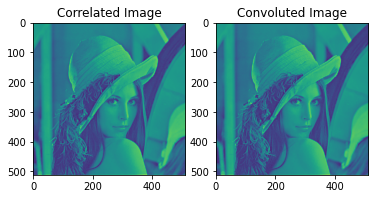

In [34]:
# Applying convolution and Correlation to same image to check the output on a symmetrical filter

im = np.array(im)
filter = np.array(([0, -1, 0], 
                   [-1, 7, -1], 
                   [0, -1, 0]))
correlated=correlate(im,filter)
convoluted=convolve(im,filter)

plt.subplot(1,2,1)
plt.imshow(correlated)
plt.title('Correlated Image')


plt.subplot(1,2,2)
plt.imshow(convoluted)
plt.title('Convoluted Image')

In [35]:
correlated[correlated!=convoluted] # Returns None if all values are same

array([], dtype=int64)

Text(0.5, 1.0, 'Convoluted Image')

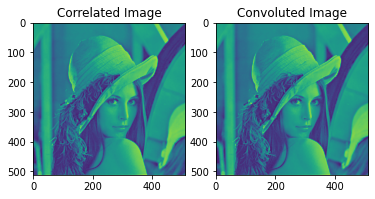

In [36]:
# Applying convolution and Correlation to same image to check the output on a non-symmetrical filter

im = np.array(im)
filter = np.array(([0, -1, 0], 
                   [-1, 7, 1], 
                   [0, -1, 0]))
correlated=correlate(im,filter)
convoluted=convolve(im,filter)

plt.subplot(1,2,1)
plt.imshow(correlated)
plt.title('Correlated Image')


plt.subplot(1,2,2)
plt.imshow(convoluted)
plt.title('Convoluted Image')

In [37]:
correlated[correlated!=convoluted] # Returns None if all values are same

array([1183, 1013, 1006, ...,  705,  713,  614])

### It can be seen that both from the images and values, the result of convolution and correlation are the same for symmetrical filters and different for non symmetrical filters


Sample Sharpen filter to check functionality

In [ ]:

image_array = np.asarray(im)

# Sharpen
filter = np.array(([0, -1, 0], 
                   [-1, 7, -1], 
                   [0, -1, 0]))

In [ ]:
filtered_im = convolve(image_array, filter)

(<matplotlib.axes._subplots.AxesSubplot at 0x7feb94260150>,
 Text(0.5, 1.0, 'Sharpened'))

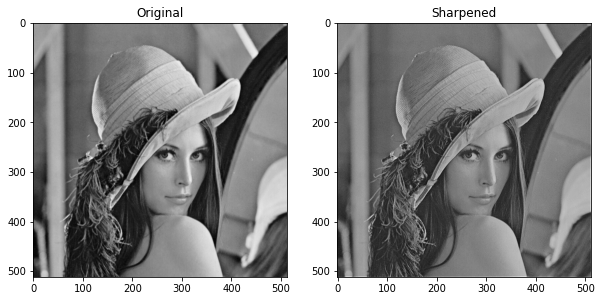

In [ ]:
fsize = (10,6)
plt.figure(figsize = fsize)
plt.subplot(121),plt.imshow(im, 'gray'), plt.title('Original')
plt.subplot(122),plt.imshow(filtered_im, 'gray'), plt.title('Sharpened')

Sobel filters to check functionality

In [ ]:
# Sobel filters
sobel_vert = np.array(([1, 0, -1], 
                       [2, 0, -2], 
                       [1, 0, -1]))

sobel_hor = np.array(([1,2,1], 
                      [0,0,0], 
                      [-1,-2,-1]))

filtered_v = convolve(image_array, sobel_vert)
filtered_h = convolve(image_array, sobel_hor)

(<matplotlib.axes._subplots.AxesSubplot at 0x7feb9180cf90>,
 Text(0.5, 1.0, 'Sobel Horizontal'))

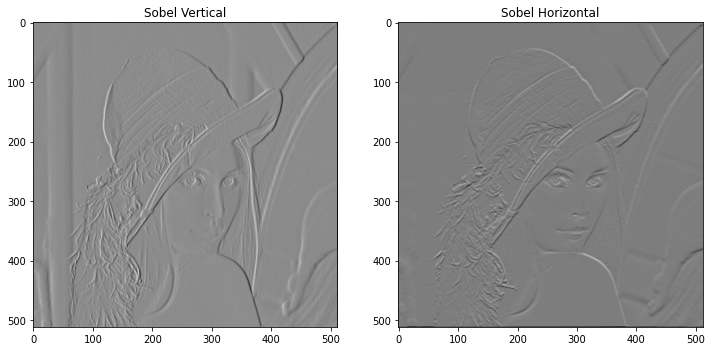

In [ ]:
fsize = (12,8)
plt.figure(figsize = fsize)
plt.subplot(121), plt.imshow(filtered_v, 'gray'), plt.title('Sobel Vertical')
plt.subplot(122), plt.imshow(filtered_h, 'gray'), plt.title('Sobel Horizontal')

In [ ]:
#Combining them
sobel_edge_detector = np.sqrt(filtered_h**2 + filtered_v**2)

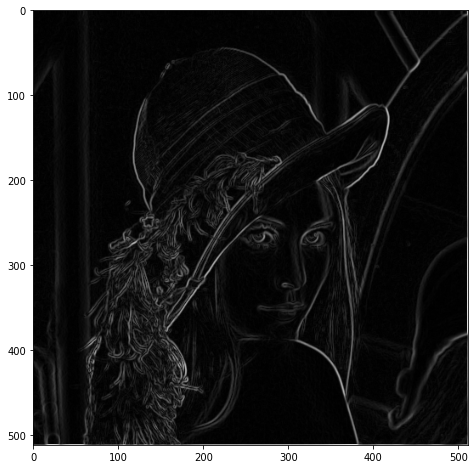

In [ ]:
plt.figure(figsize=fsize)
plt.imshow(sobel_edge_detector, 'gray')

**Try the convolve function with your own filter** *(1 points)*

Create your own filter (or use one from Google) and convolve it over your imported image

In [ ]:

filter = np.array(([0, 2, 0], 
                       [2, 0, 2], 
                       [0, 2, 0]))

In [ ]:
filtered_im = convolve(image_array, filter)

(<matplotlib.axes._subplots.AxesSubplot at 0x7feb915a7c90>,
 Text(0.5, 1.0, 'Filtered'))

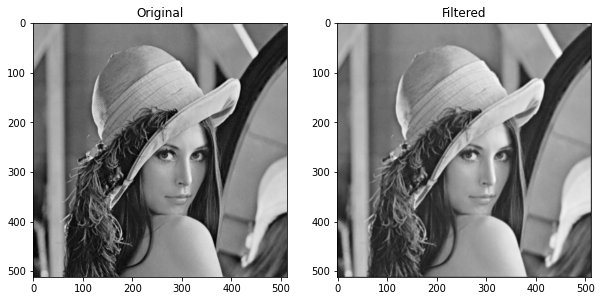

In [ ]:
fsize = (10,6)
plt.figure(figsize = fsize)
plt.subplot(121),plt.imshow(im, 'gray'), plt.title('Original')
plt.subplot(122),plt.imshow(filtered_im, 'gray'), plt.title('Filtered')

### Task 2: Creating and applying Hough filter (2 points)

**Implement Hough Transform** *(2 points)*

Create a Hough Transform to detect ***rectangles*** in a given image. It might not be perfect due to the hyperparameters you pick but your goal should be to implement the function.

Feel free to use the helper canny function along with any other inbuilt opencv methods

**Extra Credit:** Implement the Hough Transform from scratch, i.e. without using openCV (0.5 points)

In [27]:
def canny(img):
  '''
  Applies the canny filter to detect edges in a given image

  Parameters
  ----------
  img: np.ndarray
      The image as a 2-dimensional matrix

  Returns
  -------
  edges: np.ndarray
      The image after applying canny filter, i.e. with edges
      highlighted
  '''
  low_threshold = 50
  high_threshold = 500
  edges = cv2.Canny(img, low_threshold, high_threshold)
  return edges

def hough(img):
  '''
    Apply Hough Transform to a given image to detect rectangles.

    Parameters
    ----------
    img: np.ndarray
        The image as a 2-dimensional matrix

    Returns
    -------
    edges: np.ndarray
        The image after applying hough transform, i.e. with rectangles
        highlighted
  '''
  edges=canny(im)
  lines = cv2.HoughLinesP(edges,1,np.pi/180,100)
  # x1,y1,x2,y2=lines[3][0]
  # cv2.line(im,(x1,y1),(x2,y2),(0,0,255 ),3)
  # Finding similar starting points
  for i in range(len(lines)):
    for j in range(i,len(lines)):
      x1,y1,_,_=lines[i][0]
      x2,y2,_,_=lines[j][0]
      if np.allclose(x1,x2,atol=5) & (np.allclose(y1,y2,atol=5)):
        if (x1,y1,x2,y2)!=(x2,y1,x2,y2):
          _,_,x2,y2 = lines[i][0]
          _,_,x3,y3 = lines[j][0]
          if np.allclose(x1,x3,atol=5):
            width = y3-y1
            height = x2-x1
          else:
            width = y2-y1
            height = x3-x1
          cv2.rectangle(im,(x1,y2),(x1+height,y1+width),(0,0,255),5)
  return im


Text(0.5, 1.0, 'Detected')

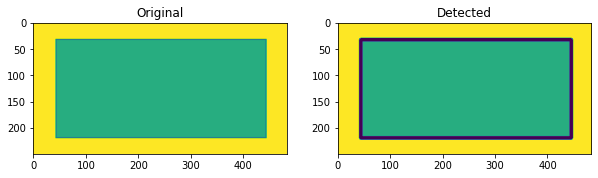

In [30]:
im = cv2.imread("/content/rect.png",0)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(im)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(hough(im))
plt.title('Detected')

#### Manually done Hough transform code attached below. The execution was take a large amount of time and hence could not implement. 

In [41]:
im = cv2.imread("rect.png")
# The function returns the pixels at which the edges are detected
# Itrating through the result to get details about the cordinates which are identified in Canny edge detection
import pandas as pd
pixels=np.array(canny(im))
cordinates=[]
count=0
for i in range(pixels.shape[0]):
  for j in range(pixels.shape[1]):
    if pixels[i][j]>0:
      cordinates.append((i,j))
    else:
      count+=1


# Creating an accumulator for 0 and d
accumulator_size = 20

accumulator=np.zeros((accumulator_size,accumulator_size))
theta = np.linspace(0,180,accumulator_size)
x_variable = [cordinate[0] for cordinate in cordinates]
y_variable = [cordinate[1] for cordinate in cordinates]


# Creating the equation for filling values inside the accumulator
from sympy import *
from tqdm import tqdm

x, y, t= symbols(' x y t') 
polar_expression = (x*cos(t))+ (y*sin(t))

# Defining the bins for equation results
binInterval = np.linspace(-50,50,20)
binLabels   = np.arange(0,19)

# Solving the equation for each pixel values for different values of theta
results=[]
for i in tqdm(x_variable):
  for j in y_variable:
    for k in theta:
      results.append(float((i*np.cos(k))+(j*np.sin(k))))
    df=pd.DataFrame()
    df['data']=results
    df['binned'] = pd.cut(df['data'], bins = binInterval, labels=binLabels)
    bins=df['binned'].values
    for bin_number in range(len(theta)):
      try:
        accumulator[bins[bin_number]][bin_number]+=1
      except:
        print(bin_number)


  0%|          | 1/1660 [00:57<26:35:52, 57.72s/it]


KeyboardInterrupt: ignored